### Импорт библиотек

In [1]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:.2f}'.format

### Первоначальный анализ данных

In [2]:
# Предобработанный файл с данными за 2022 год

df_2022 = pd.read_excel('./Поездки.xlsx', sheet_name='2022')
df_2022.head()

,Субъект,[2022] Январь,[2022] Февраль,[2022] Март,[2022] Апрель,[2022] Май,[2022] Июнь,[2022] Июль,[2022] Август,[2022] Сентябрь,[2022] Октябрь,[2022] Ноябрь,[2022] Декабрь
0,Белгородская область,27553,22940,30731,82462,66966,102349,132968,113137,60880,43365,35721,37763
1,Брянская область,20195,17668,15053,21741,27664,59052,126169,88560,40437,19404,21364,27152
2,Владимирская область,265626,186712,297407,71475,90114,79233,168551,71001,31146,192643,209233,237899
3,Воронежская область,81828,58392,65321,102256,113182,121745,138075,144349,87664,68221,64241,61849
4,Ивановская область,23843,20173,24784,76560,69470,81033,92906,86050,55336,30766,30985,27889


In [3]:
# Собираем 2022, 2023 и 2024

df_2023 = pd.read_excel('./Поездки.xlsx', sheet_name='2023')
df_2024 = pd.read_excel('./Поездки.xlsx', sheet_name='2024')

df = pd.merge(df_2022, df_2023, on = 'Субъект')
df = pd.merge(df, df_2024, on = 'Субъект')

df.head()

,Субъект,[2022] Январь,[2022] Февраль,[2022] Март,[2022] Апрель,[2022] Май,[2022] Июнь,[2022] Июль,[2022] Август,[2022] Сентябрь,...,[2024] Январь,[2024] Февраль,[2024] Март,[2024] Апрель,[2024] Май,[2024] Июнь,[2024] Июль,[2024] Август,[2024] Сентябрь,[2024] Октябрь
0,Белгородская область,27553,22940,30731,82462,66966,102349,132968,113137,60880,...,60780,53102,57499,21929,22912,40635,65891,66557,39763,36724
1,Брянская область,20195,17668,15053,21741,27664,59052,126169,88560,40437,...,25172,27097,37032,22181,32178,57171,125326,107308,47285,61580
2,Владимирская область,265626,186712,297407,71475,90114,79233,168551,71001,31146,...,77942,68110,79069,91491,87401,128583,245538,228901,153517,115290
3,Воронежская область,81828,58392,65321,102256,113182,121745,138075,144349,87664,...,72844,70179,83345,118561,123883,184222,253886,258729,140232,114423
4,Ивановская область,23843,20173,24784,76560,69470,81033,92906,86050,55336,...,39010,44782,44764,33705,33438,45402,71097,67625,51120,42264


In [4]:
# Карта РФ

russia = gpd.read_file('./gadm41_RUS_1.shp')
russia.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,RUS.1_1,RUS,Russia,Adygey,Adygea|Adygeya|Adygheya|Republic,Республика Адыгея,Respublika,Republic,NA,RU.AD,NA,"POLYGON ((40.38721 44.67212, 40.37504 44.64233..."
1,RUS.2_1,RUS,Russia,Altay,Altayskiy Kray,Алтайский край,Kray,Territory,NA,RU.AL,NA,"POLYGON ((82.74661 50.94901, 82.73914 50.94797..."
2,RUS.3_1,RUS,Russia,Amur,Amurskaya Oblast,Амурская область,Oblast,Region,NA,RU.AM,NA,"POLYGON ((130.50304 48.85646, 130.48853 48.863..."
3,RUS.4_1,RUS,Russia,Arkhangel'sk,Arcangelo|Archangel|Archangelsk|,Архангельская область,Oblast,Region,NA,RU.AR,NA,"MULTIPOLYGON (((44.51251 60.93196, 44.38121 60..."
4,RUS.5_1,RUS,Russia,Astrakhan',Astrachan|Astrakhanskaya Oblast,Астраханская область,Oblast,Region,NA,RU.AS,NA,"POLYGON ((47.87494 45.56921, 47.84983 45.55920..."


In [5]:
# Субъекты с иным названием 

set_1 = set(russia.NL_NAME_1)
set_2 = set(df['Субъект'])

set_1.difference(set_2)

{'Eврейская АОб',
 'NA',
 'Камчатская край',
 'Карачаево-Черкессия Республика',
 'Кемеровская область',
 'Магадан|Магаданская область',
 'Ненецкий АОк',
 'Пермская край',
 'Респу́блика Ингуше́тия',
 'Республика Саха',
 'Республика Северная Осетия-Алани',
 'Республика Чечено-Ингушская',
 'Санкт-Петербург (горсовет)',
 'Ханты-Мансийский АОк',
 'Чукотский АОк',
 'Ямало-Ненецкий АОк'}

In [6]:
# Словарь для последующей унификации названий субъектов 

changed_subjects = {
    'Eврейская АОб': 'Еврейская автономная область',
    'Камчатская край': 'Камчатский край',
    'Карачаево-Черкессия Республика': 'Карачаево-Черкесская Республика',
    'Кемеровская область': 'Кемеровская область - Кузбасс',
    'Магадан|Магаданская область': 'Магаданская область',
    'Ненецкий АОк': 'Ненецкий автономный округ',
    'Пермская край': 'Пермский край',
    'Респу́блика Ингуше́тия': 'Республика Ингушетия',
    'Республика Саха': 'Республика Саха (Якутия)',
    'Республика Северная Осетия-Алани': 'Республика Северная Осетия - Алания',
    'Республика Чечено-Ингушская': 'Чеченская Республика',
    'Санкт-Петербург (горсовет)': 'г.Санкт-Петербург',
    'Ханты-Мансийский АОк': 'Ханты-Мансийский автономный округ - Югра',
    'Чукотский АОк': 'Чукотский автономный округ',
    'Ямало-Ненецкий АОк': 'Ямало-Ненецкий автономный округ'
}

In [7]:
# Обработка данных и создание единого датафрейма

russia['NL_NAME_1'] = russia['NL_NAME_1'].apply(lambda x: changed_subjects[x] if x in changed_subjects else x)
russia.loc[russia['NAME_1'] == 'Moscow City', 'NL_NAME_1'] = 'г.Москва'

full_russia = pd.merge(russia, df, left_on = 'NL_NAME_1', right_on = 'Субъект', how = 'right')

full_russia = full_russia[['Субъект', 'geometry',
                           '[2022] Январь', '[2022] Февраль', '[2022] Март', '[2022] Апрель', '[2022] Май', '[2022] Июнь', '[2022] Июль', '[2022] Август', '[2022] Сентябрь', '[2022] Октябрь', '[2022] Ноябрь', '[2022] Декабрь', 
                           '[2023] Январь', '[2023] Февраль', '[2023] Март', '[2023] Апрель', '[2023] Май', '[2023] Июнь', '[2023] Июль', '[2023] Август', '[2023] Сентябрь', '[2023] Октябрь', '[2023] Ноябрь', '[2023] Декабрь', 
                           '[2024] Январь', '[2024] Февраль', '[2024] Март', '[2024] Апрель', '[2024] Май', '[2024] Июнь', '[2024] Июль', '[2024] Август', '[2024] Сентябрь', '[2024] Октябрь']]
full_russia.rename(columns=({'Субъект': 'Регион'}), inplace=True)

In [8]:
# Просмотр итогового датафрейма

full_russia.head()

,Регион,geometry,[2022] Январь,[2022] Февраль,[2022] Март,[2022] Апрель,[2022] Май,[2022] Июнь,[2022] Июль,[2022] Август,...,[2024] Январь,[2024] Февраль,[2024] Март,[2024] Апрель,[2024] Май,[2024] Июнь,[2024] Июль,[2024] Август,[2024] Сентябрь,[2024] Октябрь
0,Белгородская область,"POLYGON ((39.24822 50.11578, 39.28577 50.09164...",27553,22940,30731,82462,66966,102349,132968,113137,...,60780,53102,57499,21929,22912,40635,65891,66557,39763,36724
1,Брянская область,"POLYGON ((31.80120 52.11991, 31.80121 52.12350...",20195,17668,15053,21741,27664,59052,126169,88560,...,25172,27097,37032,22181,32178,57171,125326,107308,47285,61580
2,Владимирская область,"POLYGON ((42.02914 55.33471, 41.98012 55.33450...",265626,186712,297407,71475,90114,79233,168551,71001,...,77942,68110,79069,91491,87401,128583,245538,228901,153517,115290
3,Воронежская область,"POLYGON ((39.33907 49.96605, 39.37429 49.99398...",81828,58392,65321,102256,113182,121745,138075,144349,...,72844,70179,83345,118561,123883,184222,253886,258729,140232,114423
4,Ивановская область,"POLYGON ((42.28152 56.45627, 42.23341 56.43887...",23843,20173,24784,76560,69470,81033,92906,86050,...,39010,44782,44764,33705,33438,45402,71097,67625,51120,42264


### Основная часть исследования

Целью настоящего исследования является анализ данных о поездках в субъекты России как для последующего определения наиболее популярных у туристов регионов в зависимости от месяца, так и рассмотрения временных рядов на предмет закономерностей. Также важной частью работы является визуальная составляющая: планируется возможность наглядной демонстрации сезонного спроса на посещение того или иного региона

In [74]:
# Посмотрим на топ-5 регионов датафрейма, отсортированного по убыванию кол-ва поездок в январе 2022 года

full_russia.sort_values('[2022] Январь', ascending=False).head(6)

,Регион,geometry,[2022] Январь,[2022] Февраль,[2022] Март,[2022] Апрель,[2022] Май,[2022] Июнь,[2022] Июль,[2022] Август,...,[2024] Январь,[2024] Февраль,[2024] Март,[2024] Апрель,[2024] Май,[2024] Июнь,[2024] Июль,[2024] Август,[2024] Сентябрь,[2024] Октябрь
17,г.Москва,"MULTIPOLYGON (((37.71831 55.88284, 37.71856 55...",1338665,1247306,1155661,1154900,1258177,1365041,1269497,1218712,...,1621544,1556791,1575326,1776767,1808912,1942403,1897169,1921275,1670503,1733918
24,Ленинградская область,"MULTIPOLYGON (((27.73966 58.99433, 27.73981 58...",698385,593942,769992,1587237,1594042,2242641,2708086,2173344,...,620367,573306,627574,535600,645142,1078053,1325570,1317606,815153,498889
9,Московская область,"POLYGON ((38.85770 54.56651, 38.85766 54.56567...",673985,540331,560503,1158009,1363935,1520353,3191453,2308562,...,961476,1006854,971087,1690057,1674314,1895739,2032188,2023057,1634803,1398890
32,Краснодарский край,"MULTIPOLYGON (((40.47564 43.54548, 40.46253 43...",646352,556966,707728,2136057,2097945,2198900,3323878,2719880,...,729884,772853,1014925,1419770,1457375,1862822,3010800,3159631,2665292,1285317
28,г.Санкт-Петербург,"MULTIPOLYGON (((30.35423 60.13119, 30.38344 60...",569559,436474,510326,792528,771941,1038291,979647,789912,...,810224,749432,899784,1112831,1209708,1404526,1410630,1347739,1090764,1182252
2,Владимирская область,"POLYGON ((42.02914 55.33471, 41.98012 55.33450...",265626,186712,297407,71475,90114,79233,168551,71001,...,77942,68110,79069,91491,87401,128583,245538,228901,153517,115290


In [10]:
# Посмотрим разницы между 5-м и 6-м местами

columns = full_russia.columns[2:].tolist()
differences = []
divisions = []

for i in range(len(columns)):
    month = columns[i]
    differences.append(full_russia.sort_values(columns[0], ascending=False).iloc[4, 2 + i] - full_russia.sort_values(columns[0], ascending=False).iloc[5, 2 + i])
    divisions.append(full_russia.sort_values(columns[0], ascending=False).iloc[4, 2 + i] / full_russia.sort_values(columns[0], ascending=False).iloc[5, 2 + i])

print(f'Абсолютная средняя разница между 5-м и 6-м местом рейтинга: {pd.Series(differences).mean().round(2)}')
print(f'Cредняя разница между 5-м и 6-м местом рейтинга в частном: {pd.Series(divisions).mean().round(2)}')

Абсолютная средняя разница между 5-м и 6-м местом рейтинга: 737024.44
Cредняя разница между 5-м и 6-м местом рейтинга в частном: 8.8


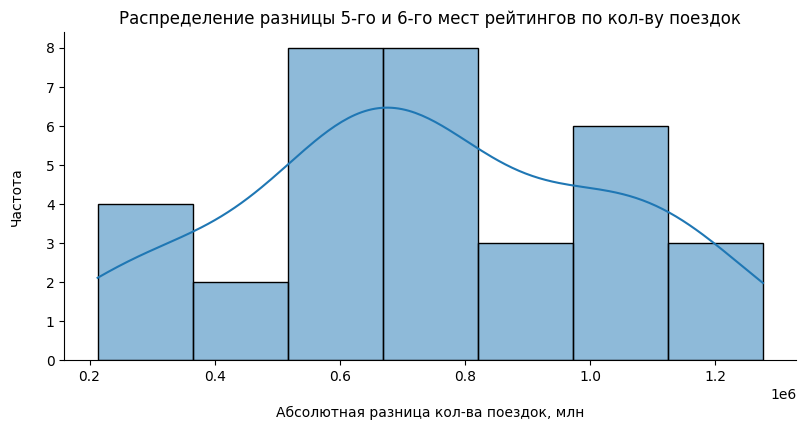

In [11]:
# Посмотрим на распределение разниц

sns.displot(differences, kde=True, height=4, aspect=2)

plt.title('Распределение разницы 5-го и 6-го мест рейтингов по кол-ву поездок')
plt.xlabel('\nАбсолютная разница кол-ва поездок, млн')
plt.ylabel('Частота\n')
plt.show()

Анализ самых востребованных регионов с точки зрения количества поездок показал, что в топ-5 субъектов неизменно входят:  

* Москва
* Московская область
* Санкт-Петербург
* Ленинградская область
* Краснодарский край  

В зависимости от времени года их очередность меняется (так, Краснодарский край почти всегда лидер в летние месяцы), но сам по себе топ-5 - статичен. При этом разница между 5-м и 6-м местом может быть колоссальной - до 1.2 млн поездок. В среднем это значение около 700 тыс., что говорит о средней разнице между 5-м и 6-м местами рейтинга почти в 9 раз!  

Исходя из этого целесообразно разделить регионы на 2 группы: "лидеры" и "середнячки". Сильно выраженной закономерной разницы между "середнячками" и, допустим, 3 группой под гипотетическим названием "отстающие" не наблюдается. Но правильно ли мы определили регионы для группы лидеров? Выясним это посредством кластеризации с применением метода k-средних

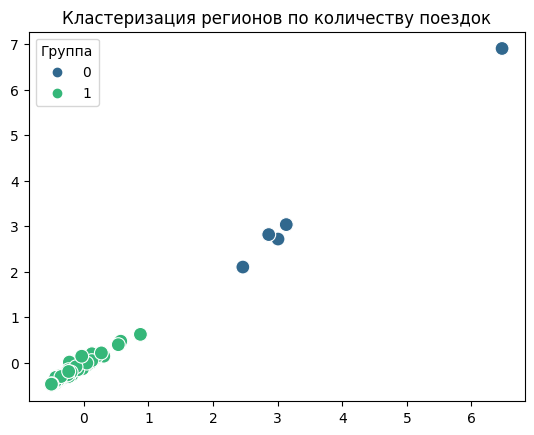

In [12]:
# Готовим данные: регионы и суммарное количество поездок
full_russia_test = full_russia.copy()
full_russia_test['total'] = full_russia_test.drop(columns=['geometry', 'Регион']).apply(lambda x: x.sum(), axis = 1)
data = full_russia_test.drop(columns='geometry')

# Выделение признака в качестве региона
X = data.drop('Регион', axis=1)

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение k-means с 2 кластерами
kmeans = KMeans(n_clusters=2, random_state=42)
data['Группа'] = kmeans.fit_predict(X_scaled)

# Визуализация кластеров
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data['Группа'], palette='viridis', s=100)
plt.title('Кластеризация регионов по количеству поездок')
plt.show()

In [13]:
# Cмотрим какие именно регионы попали в группу лидеров

data.query('Группа == 0')['Регион'].tolist()

['Московская область',
 'г.Москва',
 'Ленинградская область',
 'г.Санкт-Петербург',
 'Краснодарский край']

Итак, мы верно разделили регионы на 2 группы. В ходе исследования мы будем рассматривать обе группы по отдельности

In [14]:
# Выделяем группы

liders = full_russia.query('Регион in ("г.Санкт-Петербург", "Краснодарский край", "Ленинградская область", "г.Москва", "Московская область")')
average = full_russia.query('Регион not in ("г.Санкт-Петербург", "Краснодарский край", "Ленинградская область", "г.Москва", "Московская область")')

In [15]:
# Формируем дополнительный датафрейм для последующей визуализации динамики поездок в регионы-лидеры

liders_regions = ["г.Санкт-Петербург", "Краснодарский край", "Ленинградская область", "г.Москва", "Московская область"]
months = pd.DataFrame({'Месяц': liders.drop(columns=['Регион', 'geometry']).transpose().index})

for region in liders_regions:
    region_data = liders.query('Регион == @region').drop(columns=['geometry']).set_index('Регион').T.div(1000000).reset_index().rename(columns=({'index': 'Месяц'}))
    months = months.merge(region_data, on='Месяц')

months.head()

,Месяц,г.Санкт-Петербург,Краснодарский край,Ленинградская область,г.Москва,Московская область
0,[2022] Январь,0.57,0.65,0.70,1.34,0.67
1,[2022] Февраль,0.44,0.56,0.59,1.25,0.54
2,[2022] Март,0.51,0.71,0.77,1.16,0.56
3,[2022] Апрель,0.79,2.14,1.59,1.15,1.16
4,[2022] Май,0.77,2.10,1.59,1.26,1.36


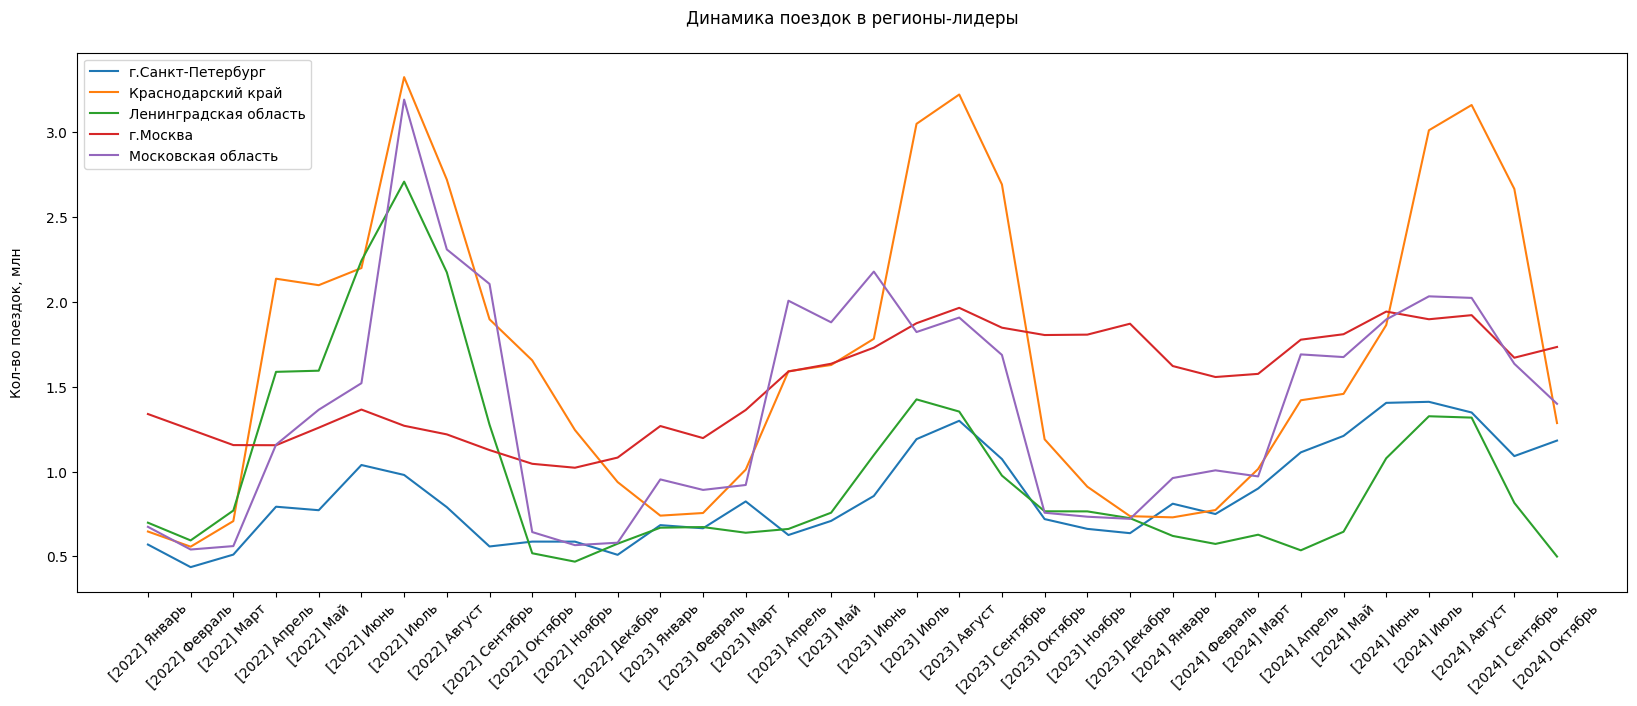

In [16]:
# Визуализируем динамику поездок

plt.figure(figsize=(20,7))

for region in liders_regions:
    sns.lineplot(data = months, x = 'Месяц', y = region, label=region)

plt.title(f'Динамика поездок в регионы-лидеры\n')
plt.xticks(rotation=45)
plt.ylabel('Кол-во поездок, млн\n')
plt.xlabel(None)
plt.legend()
plt.show()

На основе полученного графика можно сделать несколько выводов:
* **Сезонность**. Кол-во поездок сильно колеблется в зависимости от времени года и региона. Так, в Краснодарский край крайне высокий спрос наблюдается в летние месяцы. При этом в зимние месяцы активность населения гораздо ниже. Применительно к остальным регионам-лидерам за исключением Москвы данное наблюдение также будет справедливым, так как столица не подвержена сильным сезонным колебаниям.
* **Тренды**. Москва показывает стабильный рост, если сравнивать значения одних месяцев из года в года. Можем говорить о допольнительном свидетельстве долгросрочного тренда на рост привлекательности для туристов и, как следствие, увеличения кол-ва населения столичного региона.
* **Влияние внешних факторов** С февраля 2022 года наблюдается стремительный рост кол-ва поездок в Московскую, Ленинградскую области и Краснодарский край. Причем кол-во поездок в города федерального значения, наоборот, уменьшилось. Предполагаем, явление связано с введением ограничительных мер в связи с пандемией короновируса. Скорее всего люди предпочли уехать за город в поисках уединения, или они были вынуждены временно вернуться на прежнее место жительства (например, студенты).

Определение самых "туристических" месяцев за 3 года

In [17]:
# Подготовка данных для регионов-лидеров по годам

liders_2022 = liders.drop(columns=['Регион', 'geometry']).apply(lambda x: x.sum())[:12].reset_index().rename(columns=({'index': 'Месяц', 0: 'Поездки'}))
liders_2022['Месяц'] = liders_2022['Месяц'].apply(lambda x: x.split()[1])
liders_2022['Поездки'] = liders_2022['Поездки'].div(1000000)

liders_2023 = liders.drop(columns=['Регион', 'geometry']).apply(lambda x: x.sum())[12:24].reset_index().rename(columns=({'index': 'Месяц', 0: 'Поездки'}))
liders_2023['Месяц'] = liders_2023['Месяц'].apply(lambda x: x.split()[1])
liders_2023['Поездки'] = liders_2023['Поездки'].div(1000000)

liders_2024 = liders.drop(columns=['Регион', 'geometry']).apply(lambda x: x.sum())[24:].reset_index().rename(columns=({'index': 'Месяц', 0: 'Поездки'}))
liders_2024['Месяц'] = liders_2024['Месяц'].apply(lambda x: x.split()[1])
liders_2024['Поездки'] = liders_2024['Поездки'].div(1000000)

In [18]:
# Смотрим самые популярные месяцы для регионов-лидеров по годам

print(f'Топ-5 самых популярных месяца в 2022 году: {", ".join(liders_2022.sort_values("Поездки", ascending=False).head(5)["Месяц"]).lower()}')
print(f'Топ-5 самых популярных месяца в 2023 году: {", ".join(liders_2023.sort_values("Поездки", ascending=False).head(5)["Месяц"]).lower()}')
print(f'Топ-5 самых популярных месяца в 2024 году: {", ".join(liders_2024.sort_values("Поездки", ascending=False).head(5)["Месяц"]).lower()}')

Топ-5 самых популярных месяца в 2022 году: июль, август, июнь, май, сентябрь
Топ-5 самых популярных месяца в 2023 году: август, июль, сентябрь, июнь, май
Топ-5 самых популярных месяца в 2024 году: август, июль, июнь, сентябрь, май


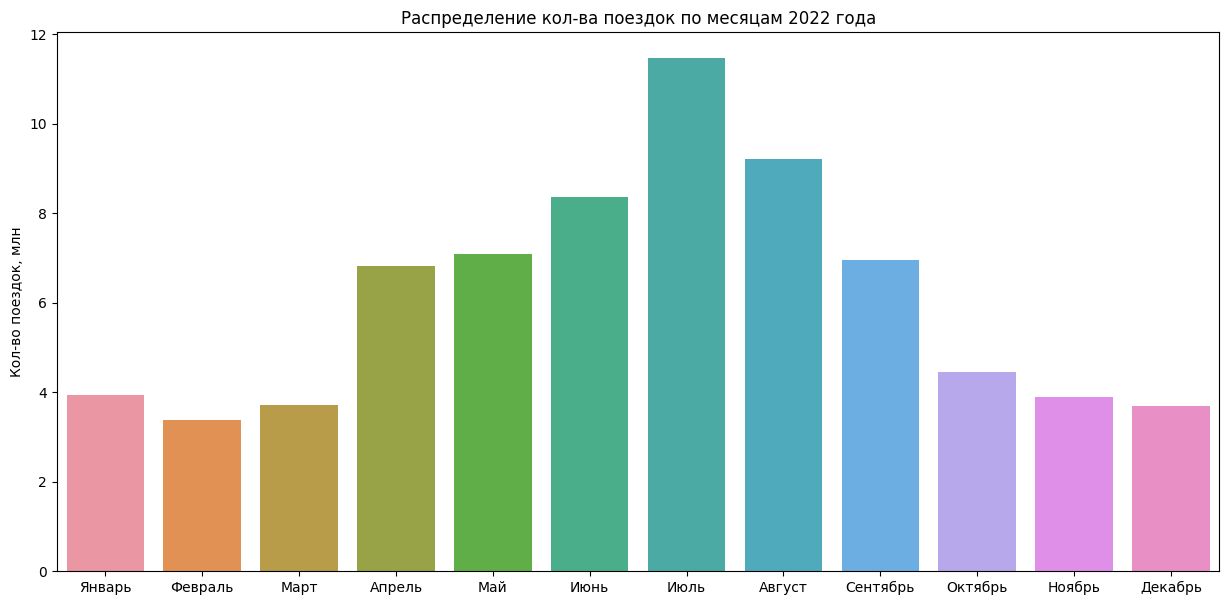

In [19]:
# 2022 год

plt.figure(figsize=(15,7))

sns.barplot(y=liders_2022['Поездки'], x=liders_2022['Месяц'])

plt.title('Распределение кол-ва поездок по месяцам 2022 года')
plt.xlabel(None)
plt.ylabel('Кол-во поездок, млн')
plt.show()

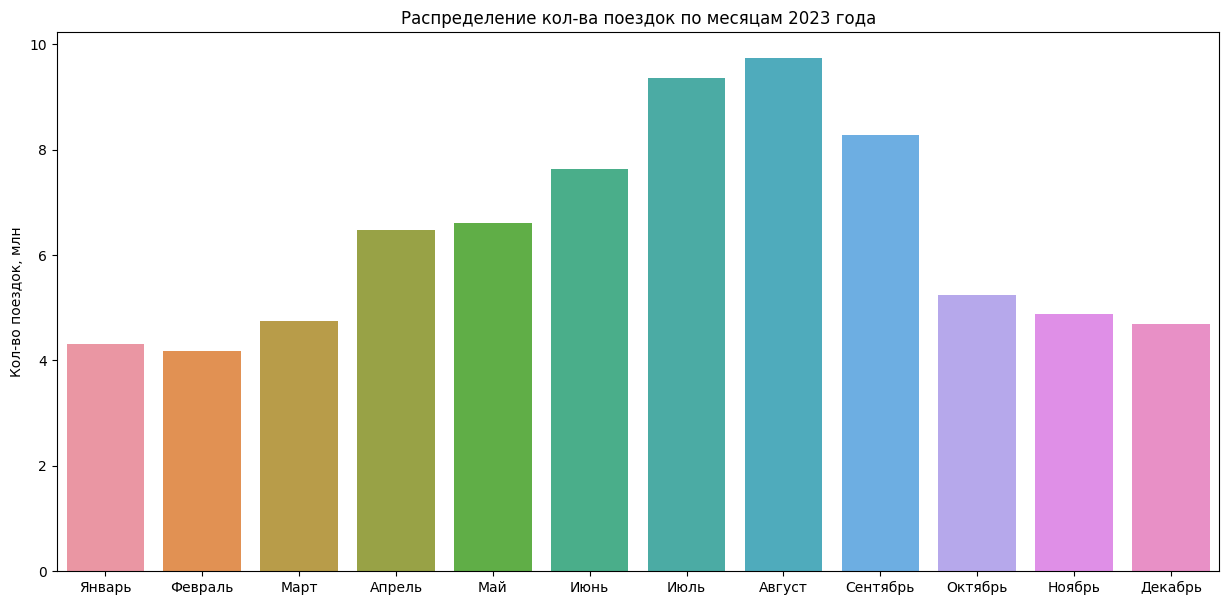

In [20]:
# 2023 год

plt.figure(figsize=(15,7))

sns.barplot(y=liders_2023['Поездки'], x=liders_2022['Месяц'])

plt.title('Распределение кол-ва поездок по месяцам 2023 года')
plt.xlabel(None)
plt.ylabel('Кол-во поездок, млн')
plt.show()

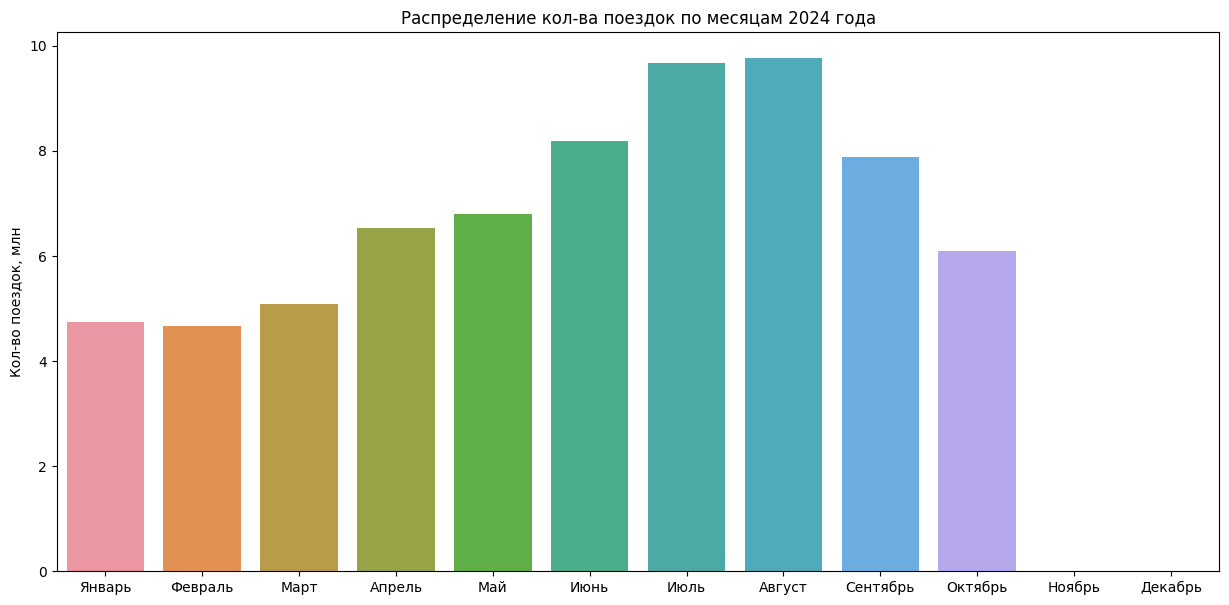

In [21]:
# 2024 год

plt.figure(figsize=(15,7))

sns.barplot(y=liders_2024['Поездки'], x=liders_2022['Месяц'])

plt.title('Распределение кол-ва поездок по месяцам 2024 года')
plt.xlabel(None)
plt.ylabel('Кол-во поездок, млн')
plt.show()

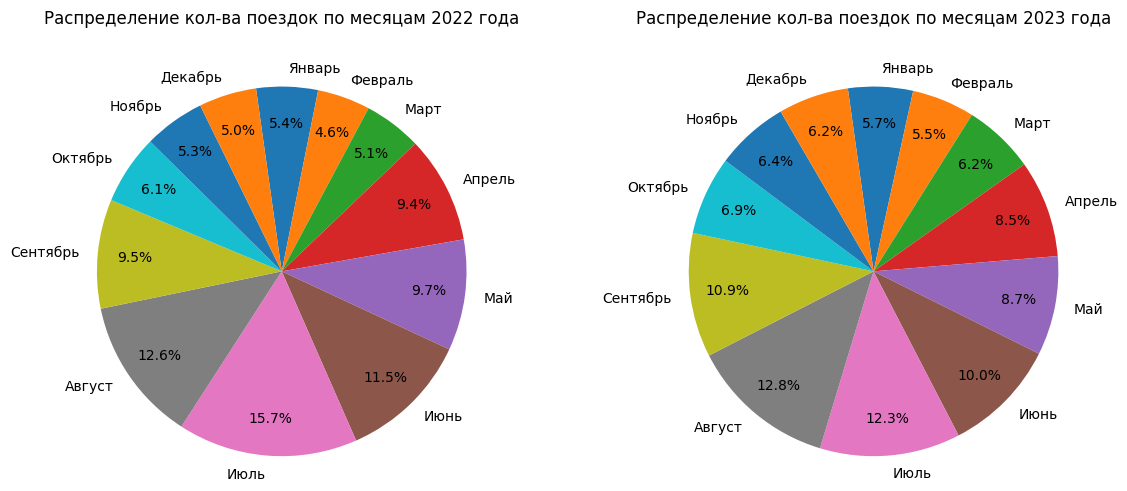

In [22]:
# Построение круговых диаграммы для 2022 и 2023 годов

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].pie(liders_2022['Поездки'], labels=liders_2022['Месяц'], autopct='%1.1f%%', startangle=98,  radius=1.2, pctdistance = 0.8, counterclock=False)
axs[0].set_title('Распределение кол-ва поездок по месяцам 2022 года', pad=40)

axs[1].pie(liders_2023['Поездки'], labels=liders_2023['Месяц'], autopct='%1.1f%%', startangle=98,  radius=1.2, pctdistance = 0.8, counterclock=False)
axs[1].set_title('Распределение кол-ва поездок по месяцам 2023 года', pad=40)

plt.show()

Из полученных данных следует, что топ-5 месяцев для совершения поездок включает в себя преимущественно на летнее время года (с мая по сентябрь включительно). Можно так же выделить апрель, так как разница между ним и маем весьма незначительна, что нельзя сказать о разнице между сентябрем и октябрем - отчетливо прослеживается конец сезона

In [23]:
# Подготовка данных для регионов-"середнячков" по годам

average_2022 = average.drop(columns=['Регион', 'geometry']).apply(lambda x: x.sum())[:12].reset_index().rename(columns=({'index': 'Месяц', 0: 'Поездки'}))
average_2022['Месяц'] = average_2022['Месяц'].apply(lambda x: x.split()[1])
average_2022['Поездки'] = average_2022['Поездки'].div(1000000)

average_2023 = average.drop(columns=['Регион', 'geometry']).apply(lambda x: x.sum())[12:24].reset_index().rename(columns=({'index': 'Месяц', 0: 'Поездки'}))
average_2023['Месяц'] = average_2023['Месяц'].apply(lambda x: x.split()[1])
average_2023['Поездки'] = average_2023['Поездки'].div(1000000)

average_2024 = average.drop(columns=['Регион', 'geometry']).apply(lambda x: x.sum())[24:].reset_index().rename(columns=({'index': 'Месяц', 0: 'Поездки'}))
average_2024['Месяц'] = average_2024['Месяц'].apply(lambda x: x.split()[1])
average_2024['Поездки'] = average_2024['Поездки'].div(1000000)

In [24]:
# Смотрим самые популярные месяцы для регионов-лидеров по годам

print(f'Топ-5 самых популярных месяца в 2022 году: {", ".join(average_2022.sort_values("Поездки", ascending=False).head(5)["Месяц"]).lower()}')
print(f'Топ-5 самых популярных месяца в 2023 году: {", ".join(average_2023.sort_values("Поездки", ascending=False).head(5)["Месяц"]).lower()}')
print(f'Топ-5 самых популярных месяца в 2024 году: {", ".join(average_2024.sort_values("Поездки", ascending=False).head(5)["Месяц"]).lower()}')

Топ-5 самых популярных месяца в 2022 году: июль, август, июнь, май, апрель
Топ-5 самых популярных месяца в 2023 году: июль, август, июнь, сентябрь, май
Топ-5 самых популярных месяца в 2024 году: июль, август, июнь, сентябрь, май


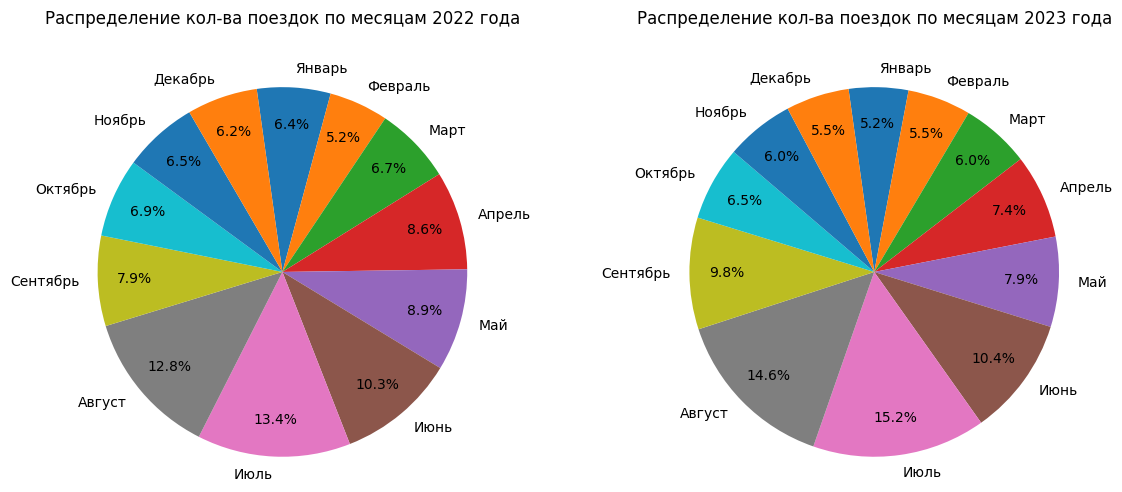

In [25]:
# Построение круговых диаграммы для 2022 и 2023 годов

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].pie(average_2022['Поездки'], labels=average_2022['Месяц'], autopct='%1.1f%%', startangle=98,  radius=1.2, pctdistance = 0.8, counterclock=False)
axs[0].set_title('Распределение кол-ва поездок по месяцам 2022 года', pad=40)

axs[1].pie(average_2023['Поездки'], labels=average_2023['Месяц'], autopct='%1.1f%%', startangle=98,  radius=1.2, pctdistance = 0.8, counterclock=False)
axs[1].set_title('Распределение кол-ва поездок по месяцам 2023 года', pad=40)

plt.show()

В целом регионы-"середнячки" мало чем отличаются от регионов-лидеров. Так, топы-5 самых популярных месяцев для поездок у обеих групп идентичны. Круговые диаграммы показывают примерно одинаковое соотношение кол-ва поездок по месяцам. Разве что можно выделить сентябрь 2022 года, когда сезон отпусков закончился раньше на месяц, а не в октябре как у регионов-лидеров

Переходим к более детальному анализу "середнячков" и визуализации уровнем выше

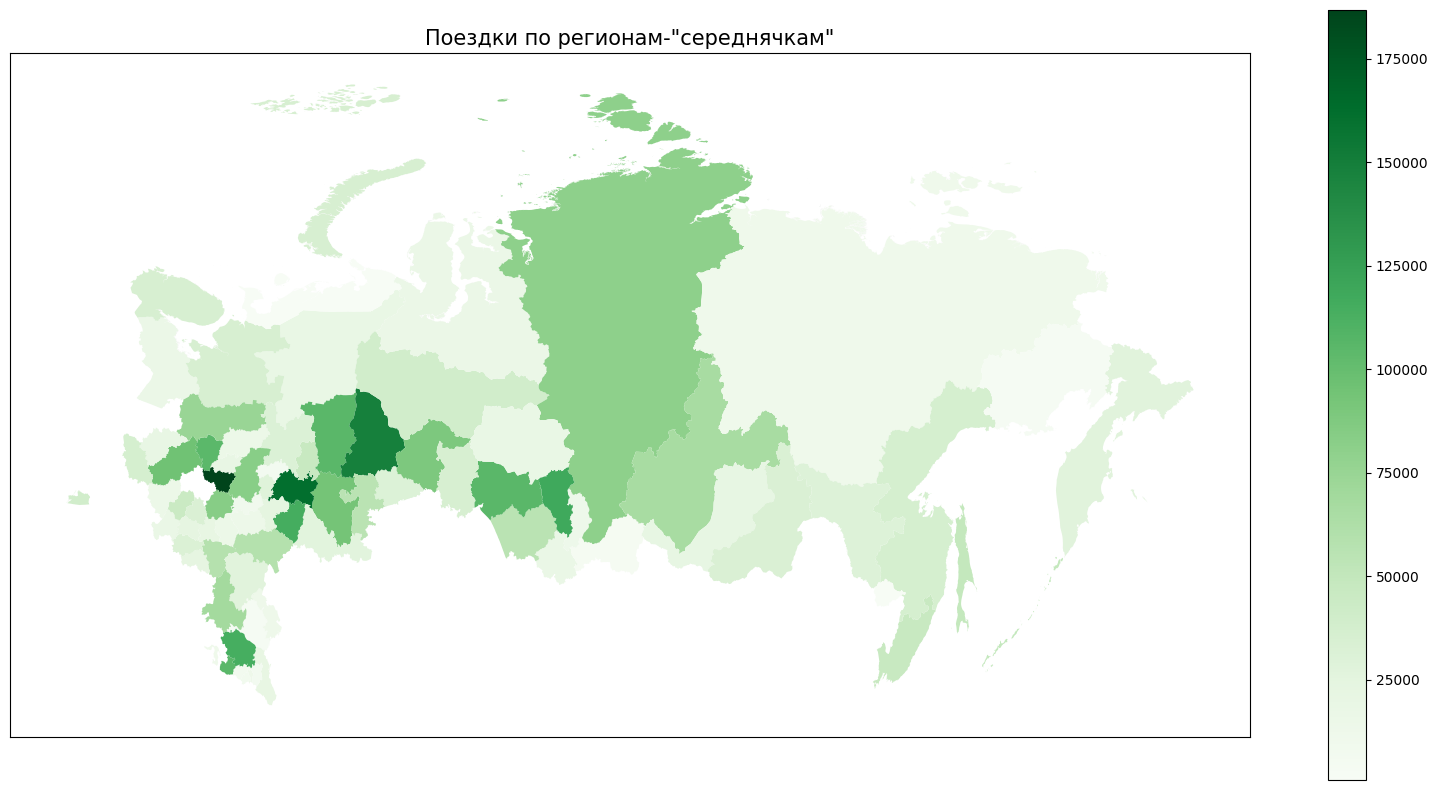

In [73]:
# Визуализируем кол-во поездок в регионы-"середнячки" на примере февраля 2022-го посредством тепловой карты 

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
average.query('Регион != "Чукотский автономный округ"').plot(column='[2022] Февраль', cmap='Greens', linewidth=0.5, ax=ax, legend=True)
ax.set_title('Поездки по регионам-"cереднячкам"', fontsize=15)

plt.xticks([])
plt.yticks([])
plt.show()

In [60]:
# Формируем и сохраняем отображения карты РФ для последующего помесячного анализа

months_names = months['Месяц'].tolist()
mins = []

for month in months_names:
    mins.append(average[month].max())

mean_max = pd.Series(mins).mean()

for month in months_names:
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    average.query('Регион != "Чукотский автономный округ"').plot(column=month, cmap='Greens', linewidth=0.5, ax=ax, vmin=0, vmax=mean_max, legend=True)
    ax.set_title(f'{month}: поездки по регионам-"cереднячкам"', fontsize=15)
    
    plt.xticks([])
    plt.yticks([])
    plt.savefig(f'./paintings/{month}.png')
    plt.close()

Карта дает визуальное представление о востребовнности регионов в тот или иной месяц. Это удобно для просмотра направлений туристического потока, но из-за цветовой палитры не совсем удобно для корректного определения наиболее интересных туристам регионов. Поэтому составим рейтинг:

In [28]:
# Создаем словарь из топ-регионов по месяцам для 2022 года 

average_2022 = average.drop(columns='geometry').iloc[:, 0:13]
months_2022 = average_2022.drop(columns='Регион').columns.tolist()
top_2022_dict = {}

for month in months_2022:
    top_2022_dict[month] = average_2022[['Регион', month]].sort_values(month, ascending=False).head(3)['Регион'].tolist()

In [29]:
# Создаем словарь из топ-регионов по месяцам для 2023 года 

average_2023 = average.drop(columns='geometry').iloc[:, [0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
months_2023 = average_2023.drop(columns='Регион').columns.tolist()
top_2023_dict = {}

for month in months_2023:
    top_2023_dict[month] = average_2023[['Регион', month]].sort_values(month, ascending=False).head(3)['Регион'].tolist()

In [30]:
# Создаем словарь из топ-регионов по месяцам для 2024 года 

average_2024 = average.drop(columns='geometry').iloc[:, [0, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]]
months_2024 = average_2024.drop(columns='Регион').columns.tolist()
top_2024_dict = {}

for month in months_2024:
    top_2024_dict[month] = average_2024[['Регион', month]].sort_values(month, ascending=False).head(3)['Регион'].tolist()

In [31]:
# Объединяем словари и сохраняем в отдельный файл для удобства

top_dict = top_2022_dict | top_2023_dict | top_2024_dict
pd.DataFrame(top_dict).T.reset_index().rename(columns=({'index': "Месяц", 0: "Топ-1", 1: "Топ-2", 2: "Топ-3"})).to_excel('top_regions.xlsx', index=False)

### Вывод

Были проанализировали данные по туристскому потоку за период с января 2022 по октябрь 2024 года. Результатом анализа стало определение наиболее популярных у туристов топ-3 регионов в зависимости от месяца года, определение неизменных регионов-лидеров с последующим рассмотрением временного ряда на предмет закономерностей, составление результирующей динамической карты РФ по регионам-«середнячкам» с возможностью отслеживать ежемесячные изменения по турпотоку. Полученные в ходе работы результаты могут быть использованы при разработке стратегий развития туризма в регионах. Так, для регионов-лидеров мы говори про укрепление позиций (если регионы, такие как Крым, Краснодарский край и Москва, стабильно входят в топ-3, можно разработать стратегии для укрепления их позиций), а динамическая карта регионов-«середнячков» позволяет выявить те из них, которые демонстрируют рост или снижение туристского потока. Для регионов с ростом можно предложить меры по поддержке (например, субсидии для бизнеса), а для тех, где наблюдается снижение, — провести анализ причин и разработать программы по повышению привлекательности.
